# [Kaggle] Bike Sharing Demand(EDA)

## 1. 라이브러리 불러오기

In [1]:
#키오스크 자전거 대여 기록 -> dataset
#count 예측하는 문제(분류와 회귀 중 회귀)
#라벨 값이 있으니, 지도학습임

#어떤 요소(독립변수)가 count(종속변수)와 깊은 관계가 있을까? 결정적인 독립변수를 찾아야지. 
#알고리즘 돌리기 전에, 시각화해서 직접 보자.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

#ggplot 스타일은 격자로 숫자범위가 나타남
plt.style.use('ggplot')

#그래프에서 마이너스 폰트가 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus']=False

## 2. 데이터 셋 불러오기

#### Columns Discription

| Feature    | Explanation                     
|:-----------|:------------|
| season(계절)     | 1:springer, 2:summer, 3:fall, 4:winter
| Datetime   | year - 0 : 2011, 1 : 2012
| holiday(휴일)    | weather day is holiday or not
| workingday(근무일) | if day is neither weekend nor holiday is 1, otherwise is 0.
| weather(날씨) | 1: Clear  2: Mist + Cloudy  3: Light Snow/Rain  4: Heavy Rain + Ice Pallets
| temp(기온)       | Normalized temperature in Celsius. 
| atemp(체감온도)      | Normalized **feeling** temperature in Celsius. 
| hum(습도)        | Normalized humidity. The values are divided to 100 (max)
| windspeed(풍속)  | Normalized wind speed. The values are divided to 67 (max)
| casual(일반유저)     | count of casual users
| registered(등록유저) | count of registered users
| count(총유저)         | count of total rental bikes including **both casual and registered**

* temp = The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)  
* atemp = The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

In [2]:
#parse_dates=["datetime"] : datetime 형식으로 불러옴
train=pd.read_csv("C:/Users/user/Downloads/all/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

날짜는 datetime 타입이네!

In [3]:
#train.columns, train.dtypes 동시에 보는 방법
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [4]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [5]:
#특정 칼럼에 대한 정보 describe()
train.temp.describe()
#추운 곳은 아니네. min 값을 보니

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [6]:
#null 값 있는지 확인
train.isnull().head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


### [2-2] Null값 확인

In [7]:
#null 값 다확인 하기 힘듦 : sum 활용
train.isnull().sum()
#null 값이 없는 것을 확인

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 3. EDA(Exploratory Data Analysis) + 전처리

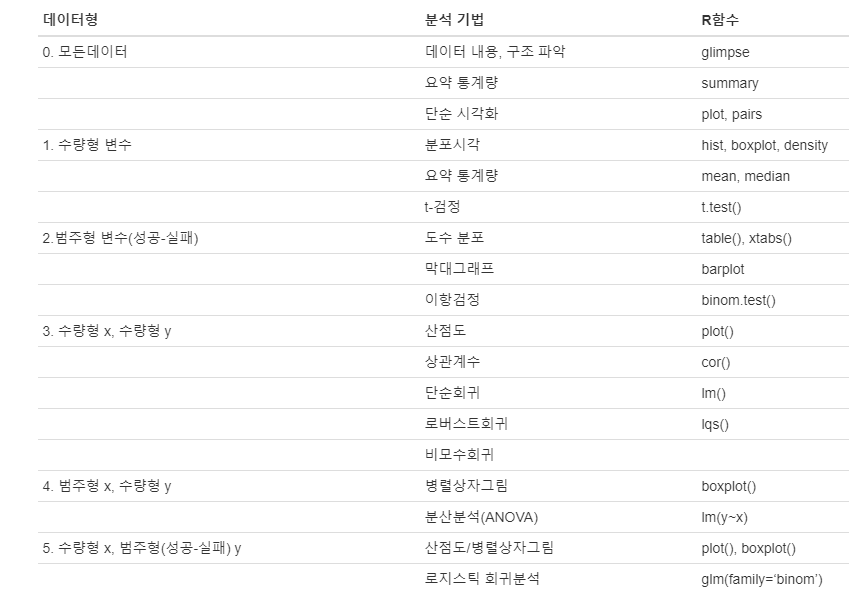

### [3-1] null값이 있는지 시각화 해주는 모듈 : missingno


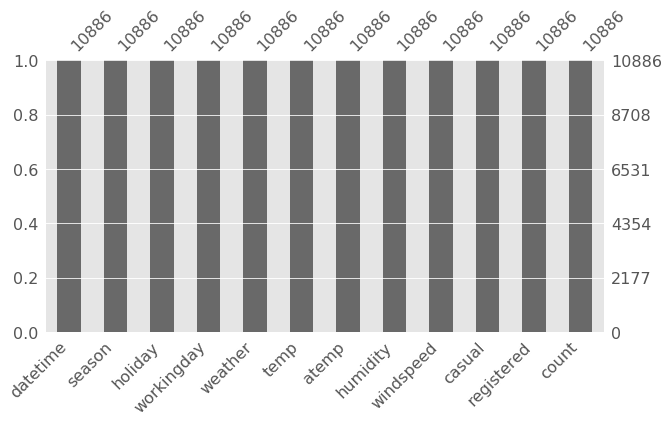

In [8]:
import missingno as msno

msno.bar(train, figsize=(10,5))
# msno.dendrogram(train)

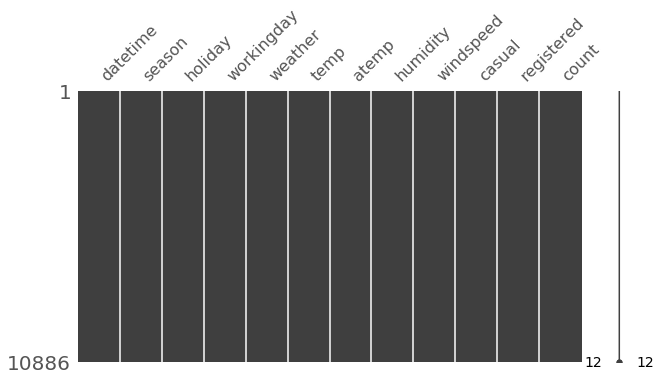

In [9]:
msno.matrix(train, figsize=(10,5))

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0
  'bottom=%s, top=%s') % (bottom, top))


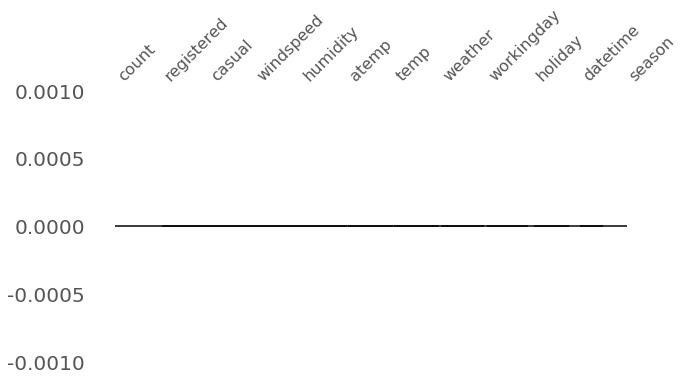

In [10]:
msno.dendrogram(train, figsize=(10,5))

### [3-2] datetime 자료형 '연-월-일-시-분-초' 분할 가능

In [11]:
#datetime 자료형을 year, month, day, hour, minute, second 단위로 분할 가능
#시간 단위별로 count 값이 어떻게 변하는지 확인
#count(종속변수)에 결정적인 영향을 미치는 독립변수인가? 시각화로 확인해보자.

train["year"]=train["datetime"].dt.year
train["month"]=train["datetime"].dt.month
train["day"]=train["datetime"].dt.day
train["hour"]=train["datetime"].dt.hour
train["minute"]=train["datetime"].dt.minute
train["second"]=train["datetime"].dt.second
train.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0


In [12]:
train.shape

(10886, 18)

    .dt.dayofwee 으로 요일도 뽑아낼 수 있다. 아래로 내리면 코드가 있다. 
    
    train["dayofweek"]=train["datetime"].dt.dayofweek
    0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일

### [3-3] 한글 폰트 깨지는 문제 대처

In [13]:
#한글 폰트 깨짐문제 대처
import platform
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

### [3-4] 시각화 : Seaborn(barplot) with subplot(여러개의 plot)

In [14]:
len(train)

10886

구분한 시간형태별로 count 값 알아보기(subplot, seaborn 활용)

[Text(0.5,1,'시간별 대여량')]

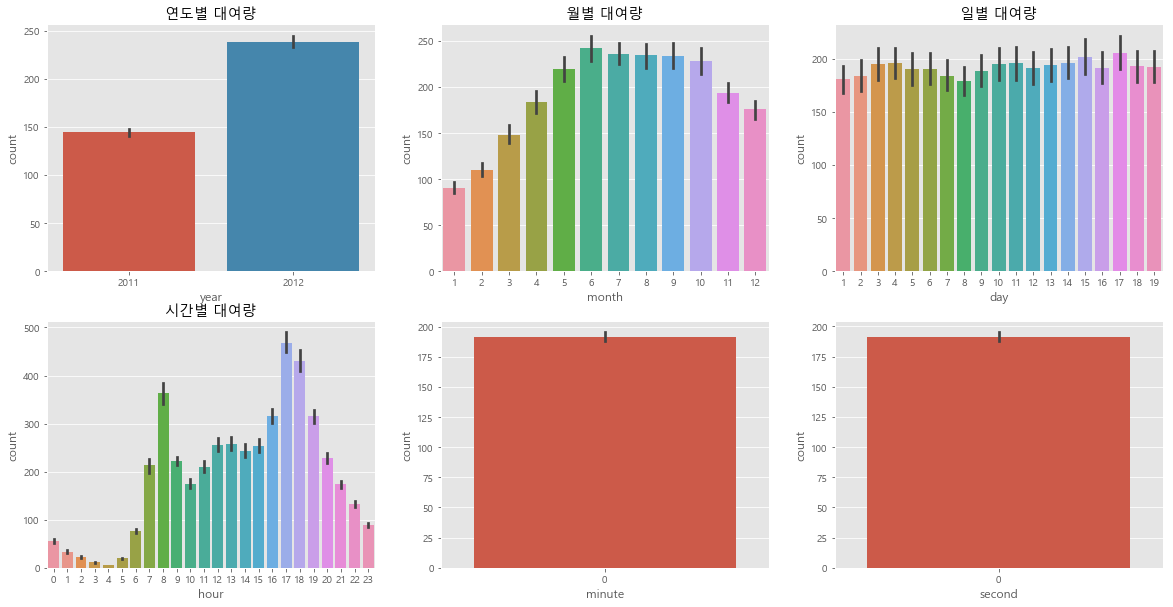

In [15]:
#subplot으로 여러개의 plot 생성
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)



#생성된 여러개의 plot에 seaborn의 barplot 만들기
sns.barplot(x=train["year"], y=train["count"], data=train, ax=ax1)
sns.barplot(x=train["month"], y=train["count"], data=train, ax=ax2)
sns.barplot(x=train["day"], y=train["count"], data=train, ax=ax3)
sns.barplot(x=train["hour"],y=train["count"], data=train, ax=ax4)
sns.barplot(x=train["minute"], y=train["count"], data=train, ax=ax5)
sns.barplot(x=train["second"], y=train["count"], data=train, ax=ax6)


#barplot의 제목 붙이기
ax1.set(title="연도별 대여량")
ax2.set(title="월별 대여량")
ax3.set(title="일별 대여량")
ax4.set(title="시간별 대여량")

시간별로 시각화 해본 결과

    1. 어떤 자료가 feature로서 의미 있을까?

    2. 연도가 영향에 미칠까? 너무 데이터가 적어서 조심해야겠는데. ----아니, null값이 없는 1만개의 데이터중에 2011, 2012에 해당하는 count 데이터가 300개도 안넘나?

    3. 월별로 확실히 차이가 많이 나네.

    4. 일별 데이터는 상식적으로도 큰 차이가 없을 것 같고, 시각적으로도 그렇게 나타남

    5. 시간대별 대여량이 가장 눈에띈다.

    6. 최소 2개 이상 분류가 되어야 유의미한 feature가 될지 알 수 있는데, 분-초는 1개니까 분석할 수 없음

In [16]:
train[["holiday"]].head()

,holiday
0,0
1,0
2,0
3,0
4,0


In [17]:
train[["registered"]].head()

,registered
0,13
1,32
2,27
3,10
4,1


### [3-4] 시간별 대여량 시각화 결과 : hour -count 유의미해 보인다. [3-6]을 참조하면 시간과의 관계는 명확해짐

### [3-5] 시각화 : Seaborn-boxplot with subplots(여러개의 plot)

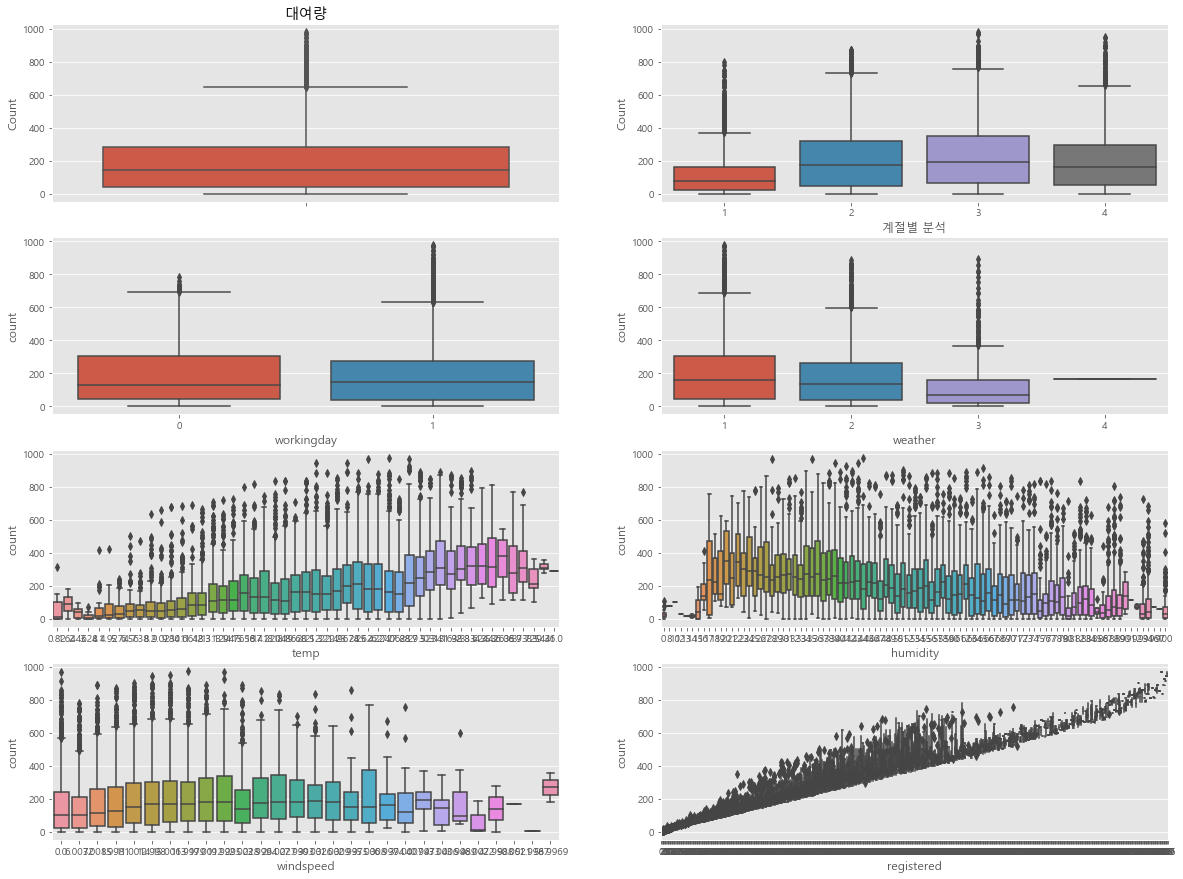

In [18]:
#boxplot형태로 시각화해서 Count 값에 영향을 주는 변수 알아보기
fig, axes = plt.subplots(nrows=4, ncols=2)
fig.set_size_inches(20,15)


# sns.boxplot(x=train["count"], orient="h")
#boxplot의 형태는 horizonal, vertical 두 가지임. 디폴트 값은 vertical임.

sns.boxplot(y=train["count"], ax=axes[0][0])
axes[0][0].set(ylabel='Count', title="대여량")

sns.boxplot(x=train["season"], y=train["count"], ax=axes[0][1])
axes[0][1].set(xlabel="계절별 분석", ylabel="Count")
            
sns.boxplot(x=train["workingday"] ,y=train["count"], ax=axes[1][0])
sns.boxplot(x=train["weather"],y=train["count"], ax=axes[1][1])
sns.boxplot(x=train["temp"],y=train["count"], ax=axes[2][0])
sns.boxplot(x=train["humidity"],y=train["count"], ax=axes[2][1])
sns.boxplot(x=train["windspeed"],y=train["count"], ax=axes[3][0])

# registered : 종류가 너무 많아서 boxplot으로 잘 안보이네 - 아래의 히스토그램이 더 적합한듯 하다
sns.boxplot(x=train["registered"],y=train["count"], ax=axes[3][1])


히스토그램

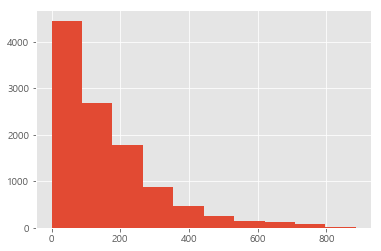

In [19]:
plt.hist(train["registered"])
plt.show()
# x축은 데이터값, y축은 빈도수

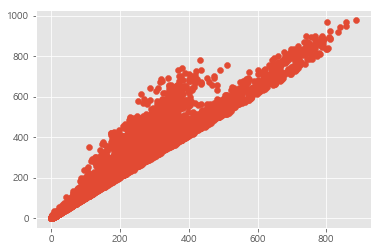

In [20]:
plt.scatter(train['registered'], train['count'])
plt.show()

이렇게 이산적인(범주) 데이터는 barplot이 더 적합함. 연속적인(수치) 데이터는 히스토그램과 산점도가 더 적합

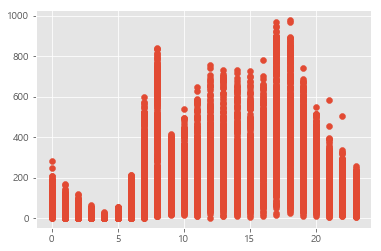

In [21]:
plt.scatter(x=train["hour"],y=train["count"])
plt.show()

In [22]:
#datetime에서 dayofweek도 추출할 수 있음
train["dayofweek"]=train["datetime"].dt.dayofweek

In [23]:
train[["dayofweek"]].head()
#0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일

,dayofweek
0,5
1,5
2,5
3,5
4,5


In [24]:
train["dayofweek"].value_counts()
#0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

### [3-6] 시각화 : ★Seaborn-pointplot with subplots

시간별로 count(총 유저) 그래프 나타내기 + hue 기능을 활용해서 그에 해당하는 데이터를 더 표현해보자!

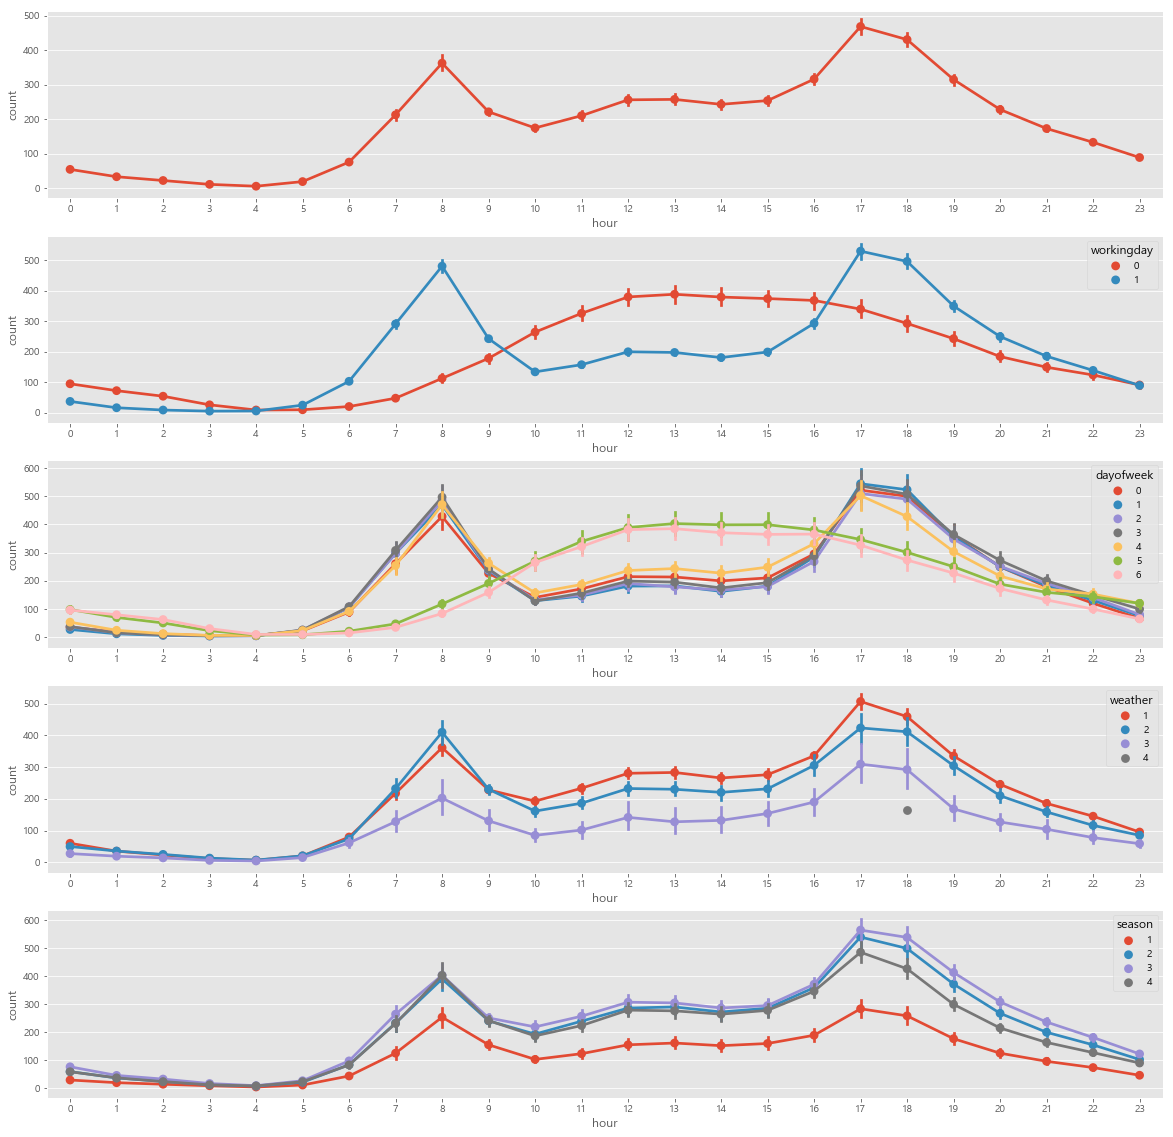

In [25]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(20,20)

sns.pointplot(x=train["hour"], y=train["count"],ax=ax1) #시간별로 count(총 유저) 그래프 나타내기
sns.pointplot(x=train["hour"], y=train["count"], hue=train["workingday"], ax=ax2) #앞의 그래프에 대응하는 working 데이터 그리기
sns.pointplot(x=train["hour"], y=train["count"], hue=train["dayofweek"], ax=ax3) # 앞의 그래프에 얹어서, dayofweek 데이터 그리기
sns.pointplot(x=train["hour"], y=train["count"], hue=train["weather"], ax=ax4)
sns.pointplot(x=train["hour"], y=train["count"], hue=train["season"],ax=ax5)

#시간대에 count가 민감하게 반응하는 것을 알 수 있다


### [3-6] 결론 :  Hour - Count 관계는 유의미해 보인다. 출근시간과 퇴근시간에 peak 찍는다. *[3-4] 참조

### [3-7] 시각화 : 데이터프레임(.corr() 상관관계 표현) - mask + df - heatmap 시각화

- 시간(Hour)과 count 관계는 유의미한 것으로 나타났으니, 다른 feature와 count의 관계를 살펴보자

In [26]:
df_for_corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
df_for_corrMatt.head()
# corrMatt_2 = train[["temp"]]
# corrMatt_2

,temp,atemp,casual,registered,humidity,windspeed,count
0,9.84,14.395,3,13,81,0.0,16
1,9.02,13.635,8,32,80,0.0,40
2,9.02,13.635,5,27,80,0.0,32
3,9.84,14.395,3,10,75,0.0,13
4,9.84,14.395,0,1,75,0.0,1


Pandas dataframe의 corr() 함수 사용

In [27]:
corrMatt = df_for_corrMatt.corr()

In [28]:
corrMatt

,temp,atemp,casual,registered,humidity,windspeed,count
temp,1.000000,0.984948,0.467097,0.318571,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,0.462067,0.314635,-0.043536,-0.057473,0.389784
casual,0.467097,0.462067,1.000000,0.497250,-0.348187,0.092276,0.690414
registered,0.318571,0.314635,0.497250,1.000000,-0.265458,0.091052,0.970948
humidity,-0.064949,-0.043536,-0.348187,-0.265458,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,0.092276,0.091052,-0.318607,1.000000,0.101369
count,0.394454,0.389784,0.690414,0.970948,-0.317371,0.101369,1.000000


In [29]:
print(corrMatt)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


In [30]:
type(corrMatt)

pandas.core.frame.DataFrame

상관관계 데이터프레임 -> 마스크 생성(np.array(df)) -> 마스크 + 데이터프레임을 -> heatmap 으로 시각화

In [31]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False # 이건 무슨 뜻일까?

seaborn의 heatmap 그리기

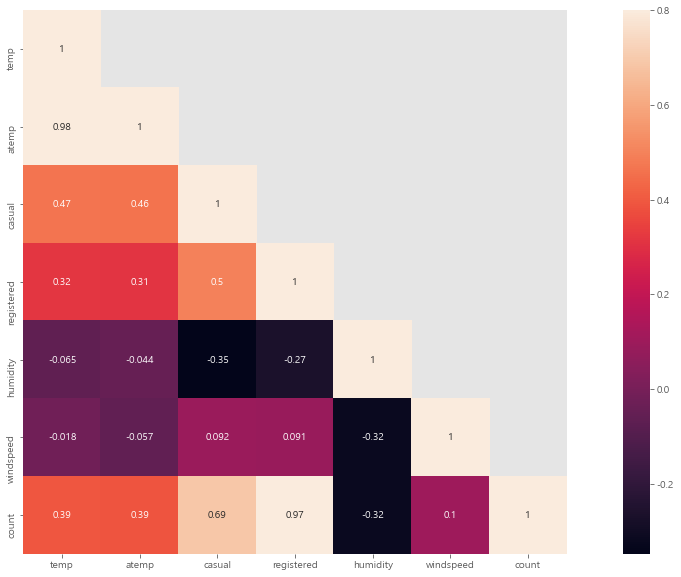

In [32]:
fig, ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

* temp(온도), atemp(온도), 습도(humidity), 풍속(windspeed)은 상관관계 낮다.
* 반면 casual, registered 와는 높은 상관관계 보임
* 회귀 그래프로 한번 그려보자

### [3-8] 시각화 :★Seaborn-regplot(회귀 그래프)

+ subplot 방법(1) fig, axes = plt.subplots(nrows=4, ncols=2)

In [33]:
# fig, axes = plt.subplots(nrows=4, ncols=2)
# fig.set_size_inches(20,15)

# sns.boxplot(y=train["count"], ax=axes[0][0])
# axes[0][0].set(ylabel='Count', title="대여량")

# sns.boxplot(x=train["season"], y=train["count"], ax=axes[0][1])
# axes[0][1].set(xlabel="계절별 분석", ylabel="Count")

+ subplot 방법(2) figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)

In [34]:
# figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
# figure.set_size_inches(20,10)

# #생성된 여러개의 plot에 seaborn의 barplot 만들기
# sns.barplot(x=train["year"], y=train["count"], data=train, ax=ax1)
# sns.barplot(x=train["month"], y=train["count"], data=train, ax=ax2)

regplot : Plot data and a linear regression model fit.

In [35]:
["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]

['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']

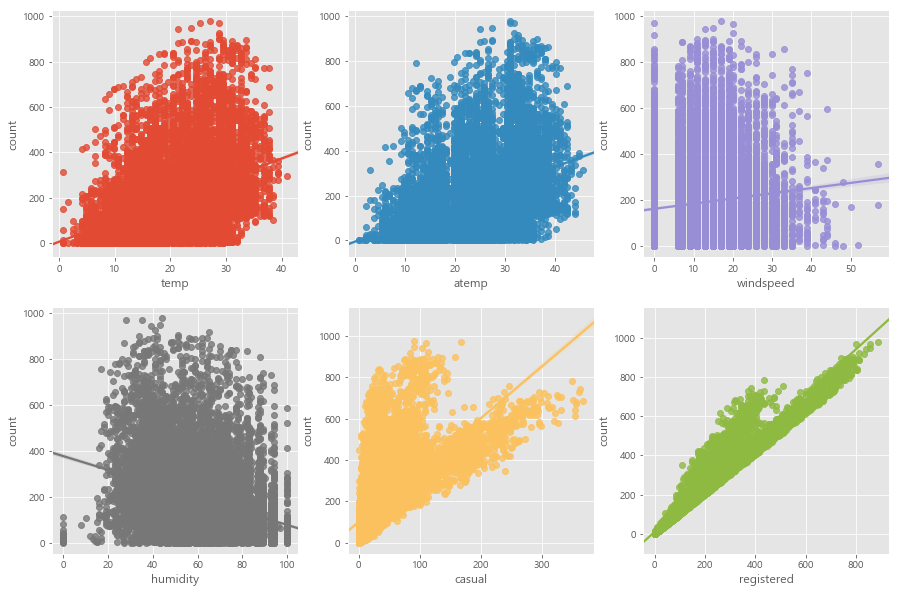

In [36]:
fig, ((ax1, ax2, ax3), (ax4, ax5,ax6)) = plt.subplots(nrows=2,ncols=3) # ncols=n 세로로 3개 만들겠다는 것. 아주 기본적인 파라메타
fig.set_size_inches(15,10)

sns.regplot(x=train["temp"], y=train["count"], ax=ax1)
sns.regplot(x=train["atemp"], y=train["count"], ax=ax2)
sns.regplot(x=train["windspeed"], y=train["count"], ax=ax3)
sns.regplot(x=train["humidity"], y=train["count"], ax=ax4)

sns.regplot(x=train["casual"], y=train["count"], ax=ax5) #casual : 일반유저
sns.regplot(x=train["registered"], y=train["count"], ax=ax6) #registerd : 등록유저 // count : 총 등록


### [4] EDA 결론

* (1) 이 자료를 정책에 쓴다고 생각해보자. 일반유저수(casual), 등록유저(registered)라는 feature가 bike demand 예측하는 데 도움이 될 수 있는가?

* (2) 내 생각은 'No'이다. 일반유저와 등록유저는 예측 변수가 될 수 없다. casual과 registerd는 bike 수요에 영향을 준 게 아니라, bike 수요자들이 bike를 어떻게 빌렸는지를 나타낸 것이다. 

* (3) 우리가 알아야 할 것은, 어떤 요소가 bike demand에 영향을 주느냐는 것이다. 예를 들어, 시간(Hour)과 temp, atemp, humidity가 있다.

* (4) temp, atemp, humidity는 count와 상관관계가 낮은 편이지만(0.3~0.4) 이 또한 의미있는 지표가 될 수 있다. 분야에 따라 상관관계의 영향력을 다르게 판단하기 때문이다.

### [번외]

* (1) 상관 분석은 확률론과 통계학에서 두 변수간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법이다. 두변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계라 한다. ((a가 커질 때 b가 커지거나 작아지는 경향이 있는가? 경향이 강하면 상관관계가 높다고 한다. 음이냐 양이냐에 따라 음의 상관관계, 양의 상관관계로 표현한다))

* (2) 선형 회귀(linear regression)는 종속 변수 y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. ((x가 커지면 y가 커지거나 작아진다)

* (3) 상관관계 vs 선형회귀

 - (1) a가 커질 때 b가 커지거나 작아지는 '경향'이 있는가 - 상관관계(상관분석)

 - (2) a가 커질 때 b가 커지거나 작아지는가 - 인과관계(회귀)

* (4) 상식적으로 생각해보면 시간(Hour, year 등)과 자전거 대여 Count사이에는 선형적인 관계가 나타나지 않을 것이다. 시간 값이 커질수록 대여량(count)이 많아지거나 혹은 적어지는 관계가 아니라는 말이다. 이번 데이터셋에 한해서는 다음과 같은 결론을 내릴 수 있다. "시간-대여량(count) 관계에서 상관관계 분석과 회귀분석은 의미가 없다."
 - 시간-count : heatmap(상관관계), regplot (X)
 - 시간-count : barplot, pointplot (O)

* (5) ★앞으로 적용
 - 새로운 데이터 셋을 EDA 한다고 가정
 - a가 커질 때 b가 커지거나 작아지는 경향이 있다고 생각하는가?, a가 커질 때 b가 커지거나 작아진다고 생각하는가?
 - 그렇다면 : heatmap(상관관계) 그래프, regplot(회귀) 그래프를 그려보자
 - 아니라면 : barplot, pointplot을 그려보자